**Math - Linear Algebra**

*Linear Algebra is the branch of mathematics that studies [vector spaces](https://en.wikipedia.org/wiki/Vector_space) and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (ie. moving it), etc.*

*Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.*

# Vectors
## Definition
A vector is a quantity defined by a magnitude and a direction. For example, a rocket's velocity is a 3-dimensional vector: its magnitude is the speed of the rocket, and its direction is (hopefully) up. A vector can be represented by an array of numbers called *scalars*. Each scalar corresponds to the magnitude of the vector with regards to each dimension.

For example, say the rocket is going up at a slight angle: it has a vertical speed of 5,000 m/s, and also a slight speed towards the East at 10 m/s, and a slight speed towards the North at 50 m/s. The rocket's velocity may be represented by the following vector:

**velocity** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

Note: by convention vectors are generally presented in the form of columns. Also, vector names are generally lowercase to distinguish them from matrices (which we will discuss below) and in bold (when possible) to distinguish them from simple scalar values such as ${meters\_per\_second} = 5026$.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent to represent vectors as simple points instead of arrows. A vector with 1 element may be represented as an arrow or a point on an axis, a vector with 2 elements is an arrow or a point on a plane, a vector with 3 elements is an arrow or point in space, and a vector with N elements is an arrow or a point in an N-dimensional space… which most people find hard to imagine.


##  Purpose
Vectors have many purposes in Machine Learning, most notably to represent observations and predictions. For example, say we built a Machine Learning system to classify videos into 3 categories (good, spam, clickbait) based on what we know about them. For each video, we would have a vector representing what we know about it, such as:

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning.

Based on this vector our Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is clickbait, and 2% that it is a good video. This could be represented as the following vector:

**class_probabilities** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

## Vectors in python
In python, a vector can be represented in many ways, the simplest being a regular python list of numbers:

In [2]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's `ndarray`, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors (for more details about NumPy, check out the [NumPy tutorial](tools_numpy.ipynb)). For example:

In [3]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

The size of a vector can be obtained using the size attribute:

In [5]:
video.size

4

The $i^{th}$ element (also called *entry* or *item*) of a vector $\textbf{v}$ is noted $\textbf{v}_i$.

Note that indices in mathematics generally start at 1, but in programming they usually start at 0. So to access $\textbf{video}_3$ programmatically, we would write:

In [6]:
video[2]  # 3rd element

3.25

## Plotting vectors
To plot vectors we will use matplotlib, so let's start by importing it (for details about matplotlib, check the [matplotlib tutorial](tools_matplotlib.ipynb)):

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

### 2D vectors
Let's create a couple very simple 2D vectors to plot:

In [8]:
u = np.array([2, 5])
v = np.array([3, 1])

These vectors each have 2 elements, so they can easily be represented graphically on a 2D graph, for example as points:

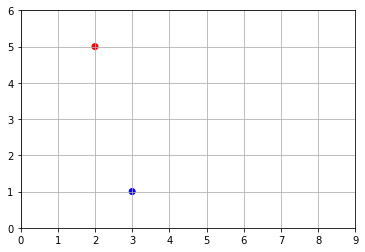

In [9]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [15]:
x_coords, y_coords, u, v

((2, 3), (5, 1), array([2, 5]), array([3, 1]))

Vectors can also be represented as arrows. Let's create a small convenience function to draw nice arrows:

In [12]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Now let's draw the vectors u and v as arrows:

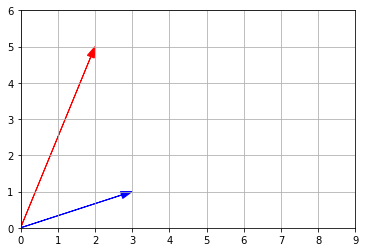

In [13]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### 3D vectors
Plotting 3D vectors is also relatively straightforward. First let's create two 3D vectors:

In [16]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Now let's plot them using matplotlib's `Axes3D`:

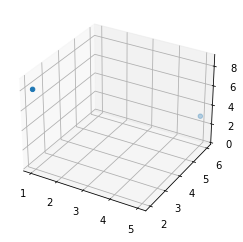

In [17]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

It is a bit hard to visualize exactly where in space these two points are, so let's add vertical lines. We'll create a small convenience function to plot a list of 3d vectors with vertical lines attached:

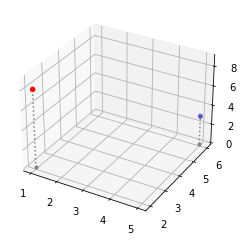

In [18]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [19]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (**Lin**ear **Alg**ebra) module:

In [20]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

Let's plot a little diagram to confirm that the length of vector $\textbf{v}$ is indeed $\approx5.4$:

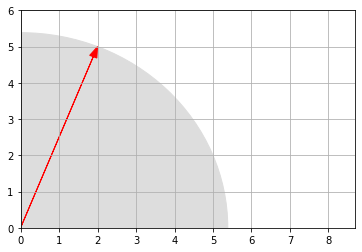

In [21]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

Looks about right!